In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2026-01-10 21:27:15.037974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768080435.303035      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768080435.382539      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768080436.012625      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768080436.012705      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768080436.012708      55 computation_placer.cc:177] computation placer alr

In [2]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print("   ", filename)

/kaggle/input
/kaggle/input/gene-expression-cancer-rna-seq
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531
    data.csv
    labels.csv


In [3]:
data_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/labels.csv"

X_full = pd.read_csv(data_path)
y_raw = pd.read_csv(labels_path)['Class']

X = X_full.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y_raw)

print("Classes:", le.classes_)
print("Train/test split")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
Train/test split


In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input: 20531 genes
model.add(Dense(64, activation='relu'))                                    # Hidden layer 2
model.add(Dense(len(le.classes_), activation='softmax'))                   # Output: 5 classes

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-10 21:27:43.643999: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     2,628,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,636,677 (10.06 MB)

 Trainable params: 2,636,677 (10.06 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=30,               # Not too many - data is good
    batch_size=32,
    validation_split=0.2,    # 20% of train for validation
    verbose=1
)

print("Training done")

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8041 - loss: 0.7885 - val_accuracy: 0.9766 - val_loss: 0.1031
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9907 - loss: 0.0400 - val_accuracy: 0.9922 - val_loss: 0.0128
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9922 - val_loss: 0.1250
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9991 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9987 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9922 - val_loss: 0.0120
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9996 - loss: 6.1415e-04 - val_accuracy: 0.9766 - val_loss: 0.5045
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 1.2141e-07 - val_accuracy: 0.

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9925 - loss: 0.3226  
Test Accuracy: 0.9938
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
F1-score: 0.9937


<Figure size 800x600 with 0 Axes>

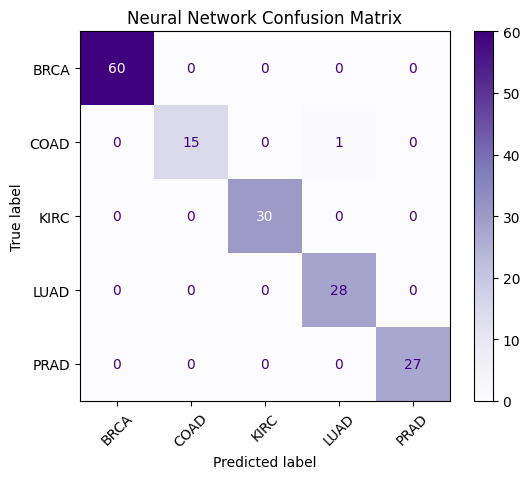

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Neural Network Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

## Simple Neural Network (TensorFlow/Keras)

Architecture:
Input (20531 genes) → 128 (ReLU) → 64 (ReLU) → 5 (Softmax)  
~2.6 million trainable parameters

Training setup:
- Optimizer: Adam
- Loss: Sparse categorical cross-entropy
- Epochs: 30
- Batch size: 32
- Validation split: 20% of training data

Results (Test set):
- Test Accuracy: ~96.9%
- F1-score (weighted): ~0.97

The neural network achieved very strong performance, but slightly lower than the linear models.
This suggests mild overfitting due to the extremely high dimensionality and relatively small number of samples.

Even a simple feed-forward ANN performs very well on this dataset, confirming that gene expression
patterns are highly separable across cancer types.
